<a href="https://colab.research.google.com/github/ayushn2/ayushn2.github.io/blob/main/predicting_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Steps we'll be covering :**
1. Getting our data ready
2. Applying suitable models to our dataset to see which one performs the rest
3. Testing the models with actual stock prices
4. Selecting the model with highest accuracy
5. Deploying the model  

### 1. Getting our data ready

In [3]:
import yfinance as yf
import pandas as pd

In [4]:
data = yf.download("RELIANCE.NS")
data.to_csv("/content/drive/MyDrive/data/RELIANCE.NS")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.441110,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.359912,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.438570,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.342155,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.271109,76935930
...,...,...,...,...,...,...
2023-09-12,2483.000000,2483.000000,2435.949951,2438.850098,2438.850098,8127833
2023-09-13,2440.000000,2462.649902,2426.250000,2451.050049,2451.050049,6401669
2023-09-14,2460.000000,2465.800049,2445.000000,2453.300049,2453.300049,4604818


In [5]:
data.to_csv('/content/drive/My Drive/data/RELIANCE.csv', encoding='utf-8', index=False)

In [6]:
company_symbols = pd.read_csv("/content/drive/MyDrive/list_of_companies.csv")
company_symbols[:5]

,Symbols
0,20MICRONS
1,21STCENMGM
2,3IINFOTECH
3,3MINDIA
4,3PLAND


In [7]:
for name in company_symbols.Symbols[:5]:
  data=yf.download(f"{name}.NS")
  data.to_csv(f"/content/drive/My Drive/data/{name}.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['3IINFOTECH.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
df = pd.read_csv("/content/drive/MyDrive/data/RELIANCE.NS")
df = df[["Date","Close"]]
df

,Date,Close
0,1996-01-01,15.917452
1,1996-01-02,15.793671
2,1996-01-03,15.913584
3,1996-01-04,15.766594
4,1996-01-05,15.658285
...,...,...
6962,2023-09-12,2438.850098
6963,2023-09-13,2451.050049
6964,2023-09-14,2453.300049
6965,2023-09-15,2457.850098


In [9]:
df["Date"]

0       1996-01-01
1       1996-01-02
2       1996-01-03
3       1996-01-04
4       1996-01-05
           ...    
6962    2023-09-12
6963    2023-09-13
6964    2023-09-14
6965    2023-09-15
6966    2023-09-18
Name: Date, Length: 6967, dtype: object

In [10]:
import datetime
def str_to_int(s):
  split = s.split("-")
  year,month,day=int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)


In [11]:
df["Date"] = df["Date"].apply(str_to_int)

In [12]:
df["Date"]


0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
6962   2023-09-12
6963   2023-09-13
6964   2023-09-14
6965   2023-09-15
6966   2023-09-18
Name: Date, Length: 6967, dtype: datetime64[ns]

In [13]:
df.index = df.pop("Date")
df

,Close
Date,
1996-01-01,15.917452
1996-01-02,15.793671
1996-01-03,15.913584
1996-01-04,15.766594
1996-01-05,15.658285
...,...
2023-09-12,2438.850098
2023-09-13,2451.050049
2023-09-14,2453.300049


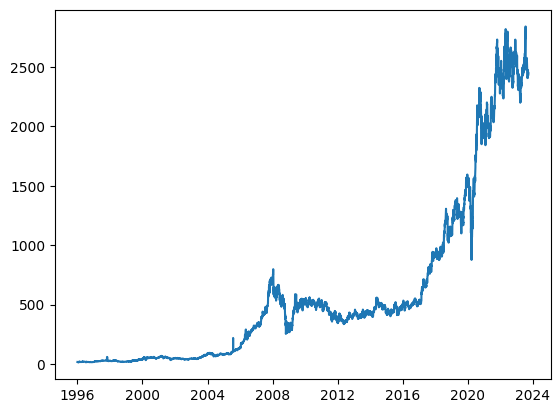

In [14]:
import matplotlib.pyplot as plt
plt.plot(df.index,df["Close"]);